In [1]:
from dotenv import load_dotenv
load_dotenv("readonly.env")

True

In [4]:
from couchers.db import session_scope
from couchers.models import Cluster, ClusterRole, ClusterSubscription, Discussion, DiscussionSubscription, HostRequest, Message, Node, Page, PageType, PageVersion, Reference, Thread, Email, User
import pandas as pd

In [5]:
run helpers

In [4]:
df = get_incomplete_communities_df()

getting communities...
getting discussions...


getting properties for communities:   0%|          | 0/12 [00:00<?, ?it/s]

In [244]:
# df

Text(0.5, 1.0, 'Userbase growth on Couchers.org')

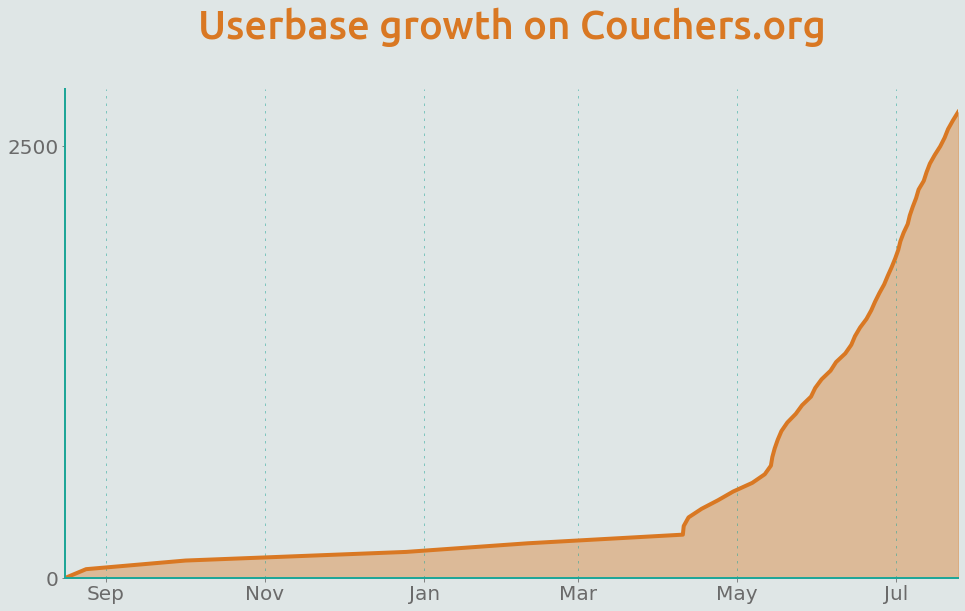

In [243]:
df = get_dataframe(User)
df = (df[["joined"]]
      .sort_values("joined")
      .reset_index(drop=True)
      .reset_index()
      .rename({"index": "cumulative_users"}, axis=1)
     )

df_plot = df.iloc[::50, :]

# plt.figure(figsize=(16,9))
orange = "#D97823"
teal = "#1FA698"
font = "Ubuntu"
tickcolor = "#6a6a6a"
background_color = "#dfe6e6"

fig, ax = plt.subplots(figsize=(16,9), facecolor=background_color)
ax.set_facecolor(background_color)

plt.ylim((0,df_plot.cumulative_users.max()*1.05))
plt.xlim((df_plot.joined.min(),df_plot.joined.max()))


ax.plot(df_plot.joined, df_plot.cumulative_users, color=orange, linewidth=4)
ax.fill_between(df_plot.joined, df_plot.cumulative_users, 0, color=orange, alpha=.4)


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color(teal)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_color(teal)
ax.spines['bottom'].set_linewidth(2)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.yaxis.set_major_locator(plt.MaxNLocator(1))
# plt.gcf().autofmt_xdate()
plt.yticks(fontsize=20, color=tickcolor, fontweight=0)
plt.xticks(fontsize=20, color=tickcolor)
ax.tick_params(colors=tickcolor, which='both')

plt.grid(color=teal, linewidth=.5, linestyle=(0,(5,10)), axis="x")
plt.title("Userbase growth on Couchers.org", fontname=font, color=orange, fontsize=40, pad=50, fontweight=500)
